In [1]:
from pylab import *
import numpy as np

h = 0.006 #time step
Nx = 10 #Number of points
Nt = 50 #This makes tf = h * Nt-1

L = 1.0
a = L/(Nx-1)

coeff = h/a**2
print(f' Coeffcient Value {coeff} ') # We have to make sure it is less than 0.5

T = np.zeros((Nx,Nt))

T[Nx//2: ,0] = 1
#print(T)

 Coeffcient Value 0.48600000000000004 


In [2]:
#Newmann Boundary Conditions Vs Dirichlet BC VS Periodic BC

for i in range(0, Nt-1):      #going up to Nt-1 not to go out of bound with t+1 below
    for j in range(0, Nx): 
        if j == 0:
            T[j,i+1] = T[j,i] + coeff*(T[j+1,i] - T[j,i]) #T(j+1) = T(j)
        elif j == Nx-1:
            T[j,i+1] = T[j,i] + coeff*(T[j-1,i] - T[j,i]) #T(j-1) = T(j)
        else:
            T[j,i+1] = T[j,i] + coeff*(T[j+1,i] + T[j-1,i]-2*T[j,i])

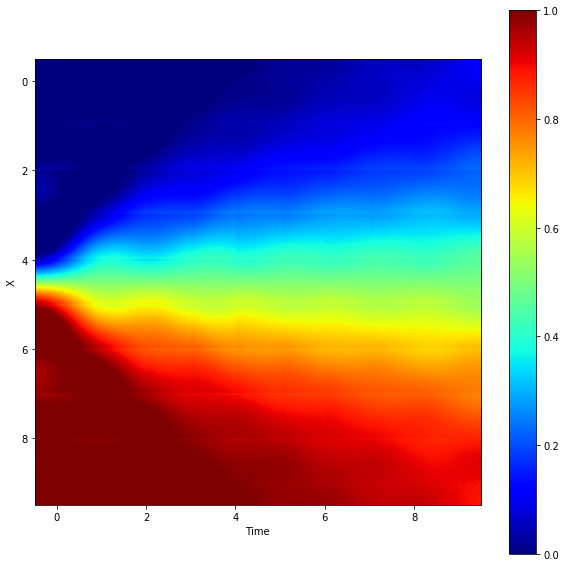

In [3]:
fig = plt.figure(figsize = (10, 10))
imshow(T[:, :10], cmap = 'jet', interpolation = 'bessel')
colorbar()
xlabel('Time')
ylabel('X')
show()

In [4]:
Density = sum(T[:, Nt-1])/Nx
print(Density)

0.5


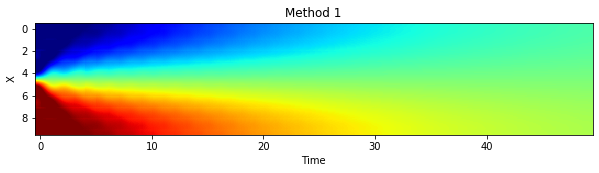

In [9]:
#Plot of Diffusion up to t = 50 where it is all spread out and green which corresponds to 0.5 on the color bar

fig = plt.figure(figsize = (10, 10))
imshow(T, cmap = 'jet', interpolation = 'bessel')
#colorbar()
title('Method 1')
xlabel('Time')
ylabel('X')
show()

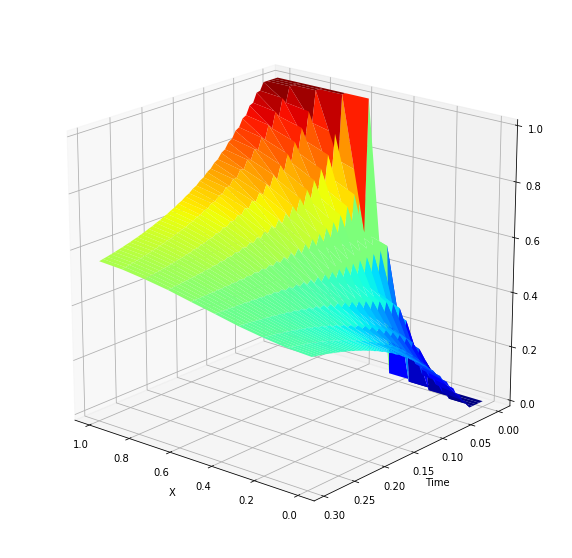

In [6]:
x = np.linspace(0,L,Nx)
t = np.linspace(0,(Nt-1)*h, Nt)
t, x = np.meshgrid(t,x)


from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
fig = plt.figure(figsize = (10, 10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x, t, T, rstride=1, cstride=1, cmap=cm.jet, linewidth=0, antialiased=True)
ax.view_init(20, 130)

xlabel("X")
ylabel("Time")
show()


In [20]:
B = np.zeros((Nx,Nt))

B[Nx//2: ,0] = 1

for i in range(Nt-1):

    # Sweeping over the bar, avoiding the two boundary points
    for j in range(1,Nx-1):
        B[j,i+1] = B[j,i] + coeff*(B[j+1,i] + B[j-1,i]-2*B[j,i])

    # Uncomment these two lines and comment out phi[-1,:] = 1 above for the Newmann B.C.
    B[0,i+1] = B[1,i+1]
    B[Nx-1,i+1] = B[Nx-2,i+1]

#fig = plt.figure(figsize = (10, 10))
#imshow(B[:, :10], cmap = 'jet', interpolation = 'bessel')
#colorbar()
show()

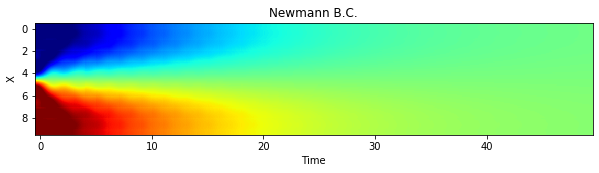

In [10]:
fig = plt.figure(figsize = (10, 10))
imshow(B, cmap = 'jet', interpolation = 'bessel')
title('Newmann B.C.')
xlabel('Time')
ylabel('X')
show()